# The Multi-layer Perceptron

## Regression Problem

- Take a set of samples generated by a simple mathematical function, try to learn the generating function (that describes how the data was made) so that we can find the values of any inputs, not just the ones we have training data for.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-2,2,80).reshape((80,1))
t = np.sin(0.5*np.pi*x) 

# Split into training, testing, and validation sets
train = x[0::2,:]
test = x[1::4,:]
valid = x[3::4,:]
traintarget = t[0::2,:]
testtarget = t[1::4,:]
validtarget = t[3::4,:]

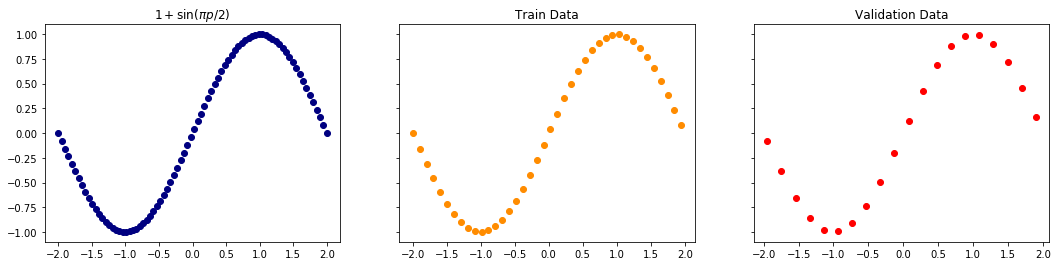

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
axs[0].plot(x, t, 'o',c='navy')
axs[0].set_title('$1 + \sin( \pi p /2 )$')

axs[1].plot(train, traintarget, 'o',c='darkorange')
axs[1].set_title('Train Data')

axs[2].plot(test, testtarget, 'o',c='r')
axs[2].set_title('Validation Data')
plt.savefig('1.png')
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
class mlp:
    def __init__(self,inputs,targets,nhidden):
        self.nin = np.shape(inputs)[1]
        self.nout = np.shape(targets)[1]
        self.ndata = np.shape(inputs)[0]
        self.nhidden = nhidden
        self.it = []
        self.er = []
        # Initialise network
        self.weights1 = (np.random.rand(self.nin+1,self.nhidden)-0.5)*2/np.sqrt(self.nin)
        self.weights2 = (np.random.rand(self.nhidden+1,self.nout)-0.5)*2/np.sqrt(self.nhidden)
        print(self.weights1.shape, self.weights2.shape)
        print('Initial weights1',self.weights1, 'Initial weights2',self.weights2)
        
    def earlystopping(self,inputs,targets,valid,validtargets,eta,niterations=10):
        valid = np.concatenate((valid,-np.ones((np.shape(valid)[0],1))),axis=1)
        
        old_val_error1 = 100002
        old_val_error2 = 100001
        new_val_error = 100000
        
        count = 0
        while (((old_val_error1 - new_val_error) > 0.0001) or ((old_val_error2 - old_val_error1)>0.0001)):
            count+=1
            print(count)
            self.mlptrain(inputs,targets,eta,niterations)
            old_val_error2 = old_val_error1
            old_val_error1 = new_val_error
            validout = self.mlpfwd(valid)
            new_val_error = 0.5*np.sum((validtargets-validout)**2)
            self.it.append(count)
            self.er.append(new_val_error)
        print('Final weights1',self.weights1, 'Final weights2',self.weights2)
        print("Stopped", new_val_error,old_val_error1, old_val_error2)
        return new_val_error

    def mlptrain(self,inputs,targets,eta,niterations):
        inputs = np.concatenate((inputs,-np.ones((self.ndata,1))),axis=1)
        change = range(self.ndata)
    
        updatew1 = np.zeros((np.shape(self.weights1)))
        updatew2 = np.zeros((np.shape(self.weights2)))
            
        for n in range(niterations):
    
            self.outputs = self.mlpfwd(inputs)

            error = 0.5*np.sum((self.outputs-targets)**2)
            if (np.mod(n,100)==0):
                print("Iteration: ",n, " Error: ",error) 
            
            deltao = (self.outputs-targets)/self.ndata
            deltah = self.hidden*(1.0-self.hidden)*(np.dot(deltao,self.weights2.T))
            updatew1 = eta*(np.dot(inputs.T,deltah[:,:-1])) + updatew1
            updatew2 = eta*(np.dot(self.hidden.T,deltao)) + updatew2
            self.weights1 -= updatew1
            self.weights2 -= updatew2
            
    def mlpfwd(self,inputs):
        self.hidden = np.dot(inputs,self.weights1);
        self.hidden = 1.0/(1.0+np.exp(-self.hidden))
        self.hidden = np.concatenate((self.hidden,-np.ones((np.shape(inputs)[0],1))),axis=1)
        outputs = np.dot(self.hidden,self.weights2);
        return outputs

In [4]:
net = mlp(train,traintarget,2)
net.mlptrain(train,traintarget,0.001,10)

net.earlystopping(train,traintarget,valid,validtarget,0.25)

test_ = x[1::4,:]
test_data = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)

outputs = net.mlpfwd(test_data)


(2, 2) (3, 1)
Initial weights1 [[ 0.3311212  -0.30181748]
 [ 0.18625513 -0.94339191]] Initial weights2 [[-0.10236218]
 [-0.69479445]
 [ 0.16509575]]
Iteration:  0  Error:  19.12168771557465
1
Iteration:  0  Error:  17.298409872650552
2
Iteration:  0  Error:  9.771706422468565
3
Iteration:  0  Error:  8.22072894599238
4
Iteration:  0  Error:  7.857221185416126
5
Iteration:  0  Error:  7.867562441068875
6
Iteration:  0  Error:  8.050131767067047
Final weights1 [[ 0.9719337  -2.53051952]
 [ 0.76310841  0.10248775]] Final weights2 [[ 0.29415606]
 [-1.57795061]
 [-0.1267208 ]]
Stopped 3.700322489204449 3.6017731633801997 3.4958766363492297


[]

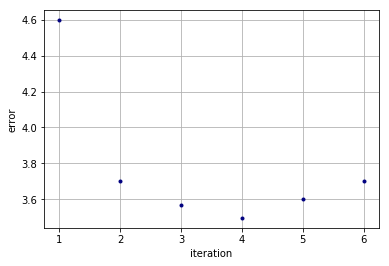

In [5]:
plt.plot(net.it, net.er, '.', c='navy')
plt.grid()
net_1_it = net.it[:80]
net_1_er = net.er[:80]
plt.ylabel('error')
plt.xlabel('iteration')
plt.savefig('2.png')
plt.plot()

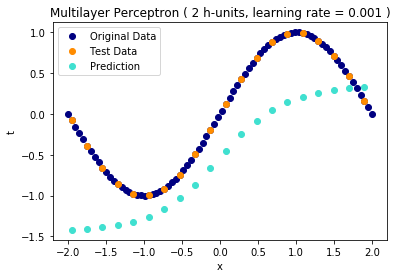

In [6]:
# Plot the data
plt.plot(x,t,'o', c='navy',label='Original Data')
plt.plot(test,testtarget ,'o', c='darkorange',label='Test Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Multilayer Perceptron ( 2 h-units, learning rate = 0.001 )')
plt.plot(test_,outputs,'o', c='turquoise',label='Prediction' )
plt.legend()
plt.savefig('3.png')
plt.show()

In [7]:
net = mlp(train,traintarget,2)
net.mlptrain(train,traintarget,1,10)

net.earlystopping(train,traintarget,valid,validtarget,0.25)

test_ = x[1::4,:]
test_data = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)

outputs = net.mlpfwd(test_data)

(2, 2) (3, 1)
Initial weights1 [[0.94459198 0.70021746]
 [0.90557836 0.40808091]] Initial weights2 [[-0.50962995]
 [-0.6224487 ]
 [-0.3933733 ]]
Iteration:  0  Error:  15.685766230773915
1
Iteration:  0  Error:  8.104968386977877
2
Iteration:  0  Error:  6.925167248714259
3
Iteration:  0  Error:  4.926720060255059
4
Iteration:  0  Error:  4.153355431739994
5
Iteration:  0  Error:  3.6122180011227796
6
Iteration:  0  Error:  3.201674591566234
7
Iteration:  0  Error:  2.9372610724589947
8
Iteration:  0  Error:  2.7136526027065706
9
Iteration:  0  Error:  2.5678834235589187
10
Iteration:  0  Error:  2.4404449642140005
11
Iteration:  0  Error:  2.357487266969371
12
Iteration:  0  Error:  2.2844507450697087
13
Iteration:  0  Error:  2.2387588733732127
14
Iteration:  0  Error:  2.1990161499831498
15
Iteration:  0  Error:  2.1771199872972247
16
Iteration:  0  Error:  2.1589628749258
17
Iteration:  0  Error:  2.1530323779520115
18
Iteration:  0  Error:  2.1494509615505883
19
Iteration:  0  Err

[]

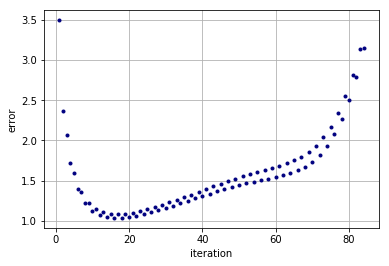

In [8]:
plt.plot(net.it, net.er, '.', c='navy')
plt.grid()
net_2_it = net.it[:80]
net_2_er = net.er[:80]
plt.ylabel('error')
plt.xlabel('iteration')
plt.savefig('4.png')
plt.plot()

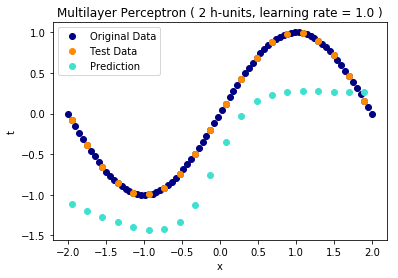

In [9]:
# Plot the data
plt.plot(x,t,'o', c='navy',label='Original Data')
plt.plot(test,testtarget ,'o', c='darkorange',label='Test Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Multilayer Perceptron ( 2 h-units, learning rate = 1.0 )')
plt.plot(test_,outputs,'o', c='turquoise',label='Prediction' )
plt.legend()
plt.savefig('5.png')
plt.show()

In [10]:
net = mlp(train,traintarget,10)
net.mlptrain(train,traintarget,0.001,10)

net.earlystopping(train,traintarget,valid,validtarget,0.25)

test_ = x[1::4,:]
test_data = np.concatenate((test,-np.ones((np.shape(test)[0],1))),axis=1)

outputs = net.mlpfwd(test_data)

(2, 10) (11, 1)
Initial weights1 [[ 0.00427504 -0.67437595  0.07041627  0.81623897 -0.82095568  0.2529948
  -0.24707401  0.08175136 -0.57093263  0.92546495]
 [ 0.33509845  0.05614271 -0.56706606  0.36472344 -0.58741364 -0.74593893
  -0.59842954 -0.0933223   0.55012211  0.89918743]] Initial weights2 [[-0.14143191]
 [ 0.30320647]
 [ 0.11504234]
 [-0.31038774]
 [ 0.20457959]
 [ 0.15368152]
 [-0.05738323]
 [-0.03907052]
 [-0.2964729 ]
 [ 0.26771252]
 [ 0.28856273]]
Iteration:  0  Error:  11.227471260743595
1
Iteration:  0  Error:  10.996046798634882
2
Iteration:  0  Error:  7.4947353223344315
3
Iteration:  0  Error:  6.143522788038723
4
Iteration:  0  Error:  3.9914693428234616
5
Iteration:  0  Error:  3.5015662256575797
6
Iteration:  0  Error:  3.042460541567963
7
Iteration:  0  Error:  2.7256701213053156
8
Iteration:  0  Error:  2.4564844858995807
9
Iteration:  0  Error:  2.232485191479282
10
Iteration:  0  Error:  2.03533487994925
11
Iteration:  0  Error:  1.8581213677394506
12
Iteratio

Iteration:  0  Error:  0.10105338847457421
183
Iteration:  0  Error:  0.10054872367457966
184
Iteration:  0  Error:  0.10004958431223177
185
Iteration:  0  Error:  0.0995560021935385
186
Iteration:  0  Error:  0.09906805457283248
187
Iteration:  0  Error:  0.09858588128462217
188
Iteration:  0  Error:  0.09810970884647477
189
Iteration:  0  Error:  0.09763988443475669
190
Iteration:  0  Error:  0.0971769238709282
191
Iteration:  0  Error:  0.09672157952869831
192
Iteration:  0  Error:  0.09627493661870759
193
Iteration:  0  Error:  0.0958385499706106
194
Iteration:  0  Error:  0.0954146387098364
195
Iteration:  0  Error:  0.0950063638391693
196
Iteration:  0  Error:  0.09461822473083892
197
Iteration:  0  Error:  0.09425662643411037
198
Iteration:  0  Error:  0.09393069271682605
Final weights1 [[ 0.56044412  0.58278881  0.51504613 -0.4969451   0.53439619  0.54677102
   0.51742962  0.51546259 -0.50117099  2.27590132]
 [ 0.44739128  0.53911666 -0.41627572  0.3940324  -0.58664824 -0.66380

[]

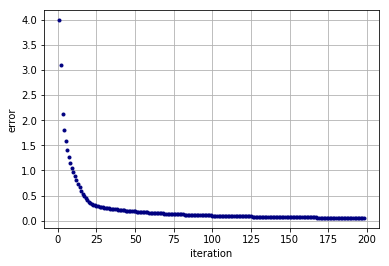

In [11]:
plt.plot(net.it, net.er, '.', c='navy')
plt.grid()

net_3_it = net.it[:80]
net_3_er = net.er[:80]
plt.ylabel('error')
plt.xlabel('iteration')
plt.savefig('6.png')
plt.plot()

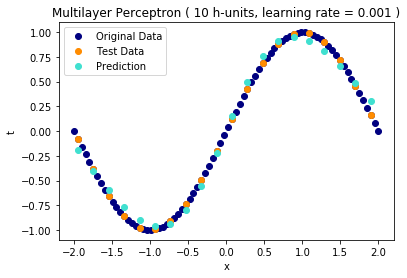

In [12]:
# Plot the data
plt.plot(x,t,'o', c='navy',label='Original Data')
plt.plot(test,testtarget ,'o', c='darkorange',label='Test Data')
plt.xlabel('x')
plt.ylabel('t')
plt.title('Multilayer Perceptron ( 10 h-units, learning rate = 0.001 )')
plt.plot(test_,outputs,'o', c='turquoise',label='Prediction' )
plt.legend()
plt.savefig('7.png')
plt.show()

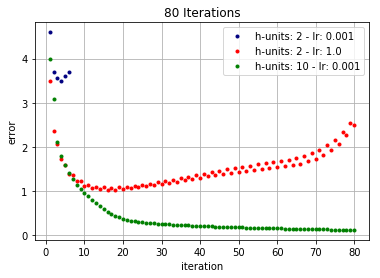

In [13]:
plt.plot(net_1_it, net_1_er, '.', label='h-units: 2 - lr: 0.001',c='navy')
plt.plot(net_2_it, net_2_er, '.', label='h-units: 2 - lr: 1.0',c='r')
plt.plot(net_3_it, net_3_er, '.', label='h-units: 10 - lr: 0.001',c='g')
plt.grid()
plt.legend()
plt.title('80 Iterations')
plt.ylabel('error')
plt.xlabel('iteration')
plt.savefig('8.png')
plt.show()
